## Нейронные сети: зависимость ошибки и обучающей способности от числа нейронов

В этом задании вы будете настраивать двуслойную нейронную сеть для решения задачи многоклассовой классификации. Предлагается выполнить процедуры загрузки и разбиения входных данных, обучения сети и подсчета ошибки классификации. Предлагается определить оптимальное количество нейронов в скрытом слое сети. Нужно так подобрать число нейронов, чтобы модель была с одной стороны несложной, а с другой стороны давала бы достаточно точный прогноз и не переобучалась. Цель задания -- показать, как зависит точность и обучающая способность сети от ее сложности.

###  Используемые данные

Рассматривается задача оценки качества вина по его физико-химическим свойствам. Данные размещены в [открытом доступе](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в репозитории UCI  и содержат 1599 образцов красного вина, описанных 11 признаками, среди которых -- кислотность, процентное содержание сахара, алкоголя и пр. Кроме того, каждому объекту поставлена в соответствие оценка качества по шкале от 0 до 10. Требуется восстановить оценку качества вина по исходному признаковому описанию.



Выполним инициализацию основных используемых модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize

import keras
import sklearn

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


Выполним загрузку данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv', delimiter=';')

In [4]:
data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Выделим из данных целевую переменную (ответы на объектах). Классы в задаче являются несбалинсированными: основной доле объектов поставлена оценка качества от 5 до 7. Приведем задачу к трехклассовой: объектам с оценкой качества меньше пяти поставим оценку 5, а объектам с оценкой качества больше семи поставим 7.





In [0]:
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.7 # Разделение данных на обучающую и контрольную части в пропорции 70/30%

y = np.array(data['quality'])
#print(y)
np.place(y, y < 5, 5)
np.place(y, y > 7, 7)
y -= min(y)
#print(y)
X = np.array(data.iloc[:, 0:11])
#print(X)
X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=0)

### Двуслойная нейронная сеть

Двуслойная нейронная сеть представляет собой функцию распознавания, которая может быть записана в виде следующей суперпозиции:

$f(x,W)=h^{(2)}\left(\sum\limits_{i=1}^D w_i^{(2)}h^{(1)}\left(\sum\limits_{j=1}^n w_{ji}^{(1)}x_j+b_i^{(1)}\right)+b^{(2)}\right)$, где

$x$ -- исходный объект (сорт вина, описанный 11 признаками), $x_j$ -- соответствующий признак,

$n$ --  количество нейронов во входном слое сети, совпадающее с количеством признаков,

$D$ --  количество нейронов в скрытом слое сети,

$w_i^{(2)}, w_{ji}^{(1)}, b_i^{(1)}, b^{(2)}$ --  параметры сети, соответствующие весам нейронов,

$h^{(1)}, h^{(2)}$ -- функции активации.

В качестве функции активации на скрытом слое и на выходном слое сети используется функция активации softmax, являющаяся обобщением сигмоидной функции на многоклассовый случай:

$y_k=\text{softmax}_k(a_1,...,a_k)=\frac{\exp(a_k)}{\sum_{k=1}^K\exp(a_k)}.$



Воспользуйтесь [советами](https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/) по выбору функции потерь

Представим векторы ответов 3-ехкласовой задачи классификации в виде двоичной матрицы классов. Например, Y = [0, 0, 2, 1] - первые два объекта принадлежат к нулевому классу, третий - ко второму, четвертый - к первому. Двоичная матрица принадлежности к классам будет иметь следующий вид: Y_bin = [[1, 0, 0],
[1, 0, 0], [0, 0, 1], [0, 1, 0]].

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

### Задание. Определение оптимального числа нейронов.
В задании требуется исследовать зависимость ошибки на контрольной выборке в зависимости от числа нейронов в скрытом слое сети. Количество нейронов, по которому предполагается провести перебор, записано в векторе 
```
hidden_neurons_num = [50, 100, 200, 500, 700, 1000]
```

1. Для фиксированного разбиения на обучающую и контрольную части подсчитайте долю неправильных ответов (ошибок) классификации на обучении/контроле в зависимости от количества нейронов в скрытом слое сети. Запишите результаты в массивы ```res_train_vec``` и ```res_test_vec```, соответственно. Постройте график зависимости ошибок на обучении/контроле от количества нейронов. Являются ли графики ошибок возрастающими/убывающими? При каком количестве нейронов достигается минимум ошибок классификации?

2. Выведите количество нейронов в скрытом слое сети, для которого достигается минимум ошибки классификации на контрольной выборке и параметры (веса) этой модели. 

Streaming output truncated to the last 5000 lines.
1119/1119 [==============================] - 0s 81us/step - loss: 0.5501 - acc: 0.7057
Epoch 283/555
1119/1119 [==============================] - 0s 77us/step - loss: 0.5502 - acc: 0.7072
Epoch 284/555
1119/1119 [==============================] - 0s 81us/step - loss: 0.5499 - acc: 0.7075
Epoch 285/555
1119/1119 [==============================] - 0s 85us/step - loss: 0.5499 - acc: 0.7069
Epoch 286/555
1119/1119 [==============================] - 0s 80us/step - loss: 0.5498 - acc: 0.7057
Epoch 287/555
1119/1119 [==============================] - 0s 79us/step - loss: 0.5500 - acc: 0.7069
Epoch 288/555
1119/1119 [==============================] - 0s 74us/step - loss: 0.5497 - acc: 0.7066
Epoch 289/555
1119/1119 [==============================] - 0s 79us/step - loss: 0.5495 - acc: 0.7063
Epoch 290/555
1119/1119 [==============================] - 0s 79us/step - loss: 0.5496 - acc: 0.7078
Epoch 291/555
1119/1119 [=============================

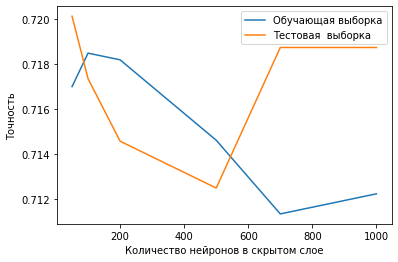

In [0]:
# Ваш код
hidden_neurons_num = [50, 100, 200, 500, 700, 1000]

res_train_vec = np.array([])
res_test_vec  = np.array([])
model_arr = []

for i in range(len(hidden_neurons_num)):
  model = Sequential()
  model.add(Dense(hidden_neurons_num[i], input_dim=len(X[0]), activation='softmax'))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model_arr.append(model)

for i in range(len(hidden_neurons_num)):
  model_arr[i].fit(X_train, y_train, epochs=555)
  score, acc1 = model_arr[i].evaluate(X_train, y_train)
  score, acc2 = model_arr[i].evaluate(X_test, y_test)
  res_train_vec = np.append(res_train_vec, acc1)
  res_test_vec  = np.append(res_test_vec,  acc2)


print(res_train_vec)
print(res_test_vec)

plt.plot(hidden_neurons_num, res_train_vec, label='Обучающая выборка')
plt.plot(hidden_neurons_num, res_test_vec,  label='Тестовая  выборка')
plt.xlabel('Количество нейронов в скрытом слое')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [0]:
i = res_test_vec.argmax(axis=0)
print('Высочайшая точность на тестовой выборке при количестве нейронов, равном: ',hidden_neurons_num[i])
print('Веса модели:')
model_arr[i].get_weights()

Высочайшая точность на тестовой выборке при количестве нейронов, равном:  50
Веса модели:


[array([[-2.3777699e+00, -1.4991719e+00, -9.2529207e-01, -1.0799787e+00,
         -1.9566613e+00, -9.7041970e-01, -9.7668998e-02, -3.6772040e-01,
         -4.0523443e-01, -2.0644367e+00, -8.0031818e-01,  1.3954871e+00,
         -5.1894629e-01, -2.4180429e+00,  6.9440395e-02, -1.6739306e+00,
          2.2110274e-01, -1.0826311e+00,  5.2191406e-01, -1.1440115e+00,
         -1.8565142e+00,  7.4212283e-01, -1.9962381e+00, -2.1920826e+00,
         -2.0534045e-01, -1.9205602e+00, -2.5096664e+00, -1.8317088e+00,
         -9.6639866e-01, -2.3728118e+00, -1.8861593e+00, -2.3621879e+00,
         -1.9176198e+00, -4.0608364e-01, -1.8192997e+00, -2.4198618e+00,
         -1.6406627e+00, -1.4534632e+00, -2.1127677e-01, -1.1195971e+00,
          1.7679163e+00, -2.1833143e+00, -7.8547227e-01,  4.6050498e-01,
          1.3344373e+00, -2.4298241e+00,  3.9369145e-01,  7.2216320e-01,
         -1.0991806e+00, -1.6241535e+00],
        [ 1.7065059e+00, -5.1264472e+00,  2.1018710e+00,  6.0616827e+00,
         